In [4]:
!uv pip install gdown inference-gpu supervision

Audited 3 packages in 11ms


In [5]:
!uv pip install git+https://github.com/roboflow/sports.git


Updating https://github.com/roboflow/sports.git (HEAD)             
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/roboflow/sports.git (HEAD)     
Updating https://github.com/robo

In [6]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /home/saurab/dev/machine-learning-projects/football-ai/0bfacc_0.mp4
100%|██████████████████████████████████████| 19.9M/19.9M [00:04<00:00, 4.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /home/saurab/dev/machine-learning-projects/football-ai/2e57b9_0.mp4
100%|██████████████████████████████████████| 21.1M/21.1M [00:04<00:00, 4.82MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /home/saurab/dev/machine-learning-projects/football-ai/08fd33_0.mp4
100%|██████████████████████████████████████| 19.9M/19.9M [00:04<00:00, 4.33MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /home/saurab/dev/machine-learning-projects/football-ai/573e61_0.mp4
100%|██████████████████████████████████████| 18.9M/18.9M [00:02<00:00, 7.21MB/s]
Downloading...
From: https://drive.google.co

In [7]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# Balls, Players, Goalkeepers and Referees detection

In [8]:
from inference import get_model

ROBOFLOW_API_KEY = ""

PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

2024-10-11 05:56:55.279945145 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:640 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


# PROCESSING OF SINGLE FRAME

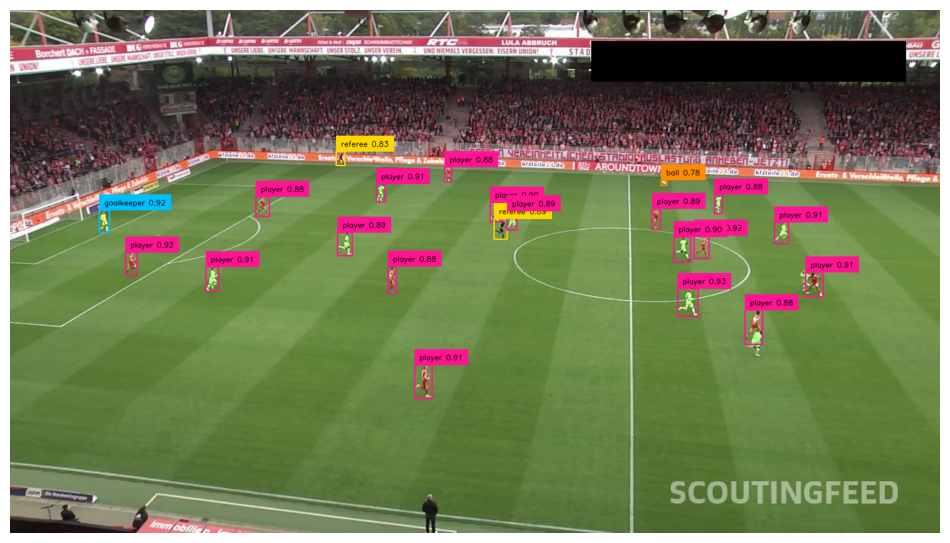

In [9]:
import supervision as sv

SOURCE_VIDEO_PATH = "121364_0.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annoted_frame = frame.copy()
annoted_frame = box_annotator.annotate(annoted_frame, detections)
annoted_frame = label_annotator.annotate(annoted_frame, detections, labels=labels)

sv.plot_image(annoted_frame)

In [12]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "121364_0.mp4"
TARGET_VIDEO_PATH = "video/121364_0_result_1.mp4"

In [13]:
import os
print(os.path.abspath(TARGET_VIDEO_PATH))

/home/saurab/dev/machine-learning-projects/football-ai/video/121364_0_result_1.mp4


# PROCESSING OF VIDEO

In [14]:

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        annoted_frame = frame.copy()
        annoted_frame = box_annotator.annotate(annoted_frame, detections)
        annoted_frame = label_annotator.annotate(annoted_frame, detections, labels=labels)
        video_sink.write_frame(annoted_frame)

# sv.plot_image(annoted_frame)

  0%|          | 0/750 [00:00<?, ?it/s]

100%|██████████| 750/750 [43:30<00:00,  3.48s/it]


In [15]:
import os

if os.path.exists(TARGET_VIDEO_PATH):
    print(f"Video saved at {TARGET_VIDEO_PATH}")
else:
    print("Video not saved, check the path or permissions.")

Video saved at video/121364_0_result_1.mp4
